In [1]:
!python --version

Python 3.6.1 :: Continuum Analytics, Inc.


In [2]:
import os
os.environ['CONDA_DEFAULT_ENV']

'astroconda35'

# Targets list

The links below show the quick look lightcurve reduced using a K2 data pipeline called [K2SFF](https://archive.stsci.edu/prepds/k2sff/) available online.

* 	KIC 11442793 or KOI-90 ()
* EPIC 246393474 or K2-141 ([paper1](https://arxiv.org/pdf/1711.02097.pdf); [paper2](https://arxiv.org/pdf/1801.03502.pdf))
* EPIC 245950175 or K2-138 ([paper](https://exoplanetarchive.ipac.caltech.edu/docs/aj_155_2_57.pdf); [news](https://exoplanets.nasa.gov/news/1479/multi-planet-system-found-through-crowdsourcing/))

# K2C8 lightcurve using everest-pipeline

* [paper](https://arxiv.org/abs/1607.00524)
* [code](https://github.com/rodluger/everest)
* [doc](http://staff.washington.edu/rodluger/everest/using_everest.html)

In [3]:
import everest
everest.__version__

'2.0.8'

## Downloading data

In [5]:
epic.time

array([ 2559.06861226,  2559.08904459,  2559.10947692, ...,  2637.73078849,
        2637.75122034,  2637.77165209])

The timeseries is stored in `star.time` and `star.flux` (PLD-de-trended flux) or `star.fcor` (de-trended flux with CBV correction). The indices of all outliers are stored in `star.mask`.

* pixel level decorrelation (PLD)
* co-trending basis vector (CVB)

INFO  [everest.user.plot()]: Plotting the light curve...


/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/everest/user.py:628: RuntimeWarning: invalid value encountered in less
  for i in np.where(flux < ylim[0])[0]:
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/everest/user.py:644: RuntimeWarning: invalid value encountered in greater
  for i in np.where(flux > ylim[1])[0]:


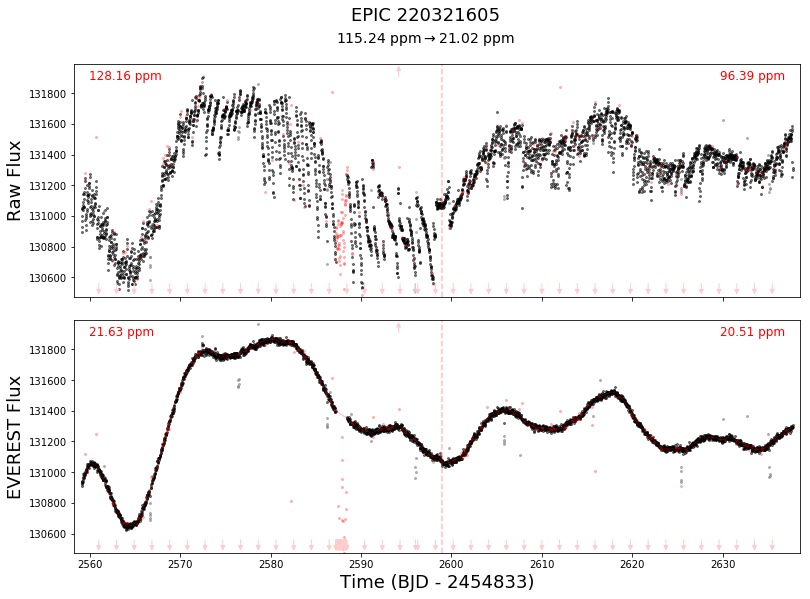

In [10]:
EPIC220321605.plot()

In [7]:
import pandas as pd

#convert to df
df = pd.DataFrame(EPIC220321605.flux, columns=['EPIC605'], index=EPIC220321605.time)

## De-trended lightcurve using everest-pipeline

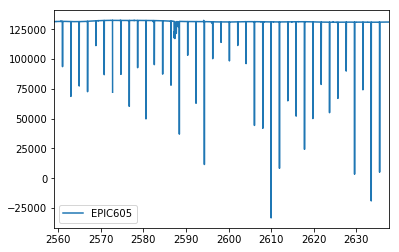

In [9]:
%matplotlib inline
df.plot()

## Phase-folding 

If there are transits/eclipses in a light curve, everest can use the GP prediction to whiten the timeseries and fold it on the period of the planet. If the time of first transit and period of an exoplanet/EB are known, plotting the folded transit/eclipse is easy. Just remember to mask the transit and re-compute the model beforehand:

In [28]:
EPIC911.time == EPIC363.time

array([False, False, False, ..., False, False, False], dtype=bool)

EPIC916.mask_planet(1980.42, 10.054)
EPIC916.compute()
EPIC916.plot_folded(1980.42, 10.054)

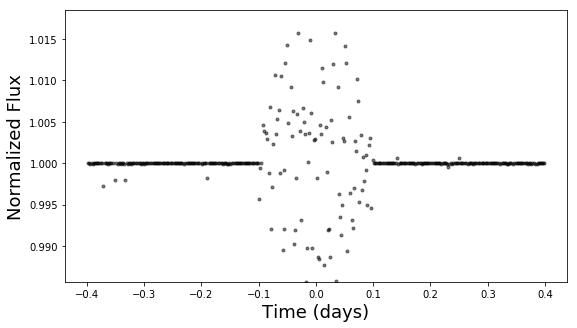

In [29]:
#guesses
EPIC363.plot_folded(t0=2098, period=8)